<a href="https://colab.research.google.com/github/Mbatiany/hypothesis_autoLib/blob/main/Brendah's_Week_4_IP_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**

This is an assessment of the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we will identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z?”. The parameters of interest will include location, and day of the week . 

To work on this project, we will perform the following analysis with Python; 

Find and deal with outliers, anomalies, and missing data within the dataset.
Plot appropriate univariate and bivariate summaries recording our observations.
Implement the solution by performing hypothesis testing.

# **Defining the Question**

Is the number of Blue Cars taken during different days of the week such as Monday and Friday different?
Are the number of cars taken in place X different from place Y over the weekend?


# **Success Metrics**
1. Identify number of blue cars taken in different periods within the week, i.e weekdays and weekends. 
2. Conduct hypothesis testing around the particular questions.
3. Select postal codes and time frames to work with.
4. Formulate appropriate conclusions and recommendations. 


# **Experimental Design**

- Importing libraries and loading datasets.

- Data preparation and cleaning

- Univariate and Bivariate analysis, and recording the observations.

- Hypothesis tests.

- Obtaining a sample.

- Making conclusions and recommendatins.

# **Importing Libraries and Loading Datasets**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import scipy.stats as stats

In [32]:
#to understand columns
Columns_exp = pd.read_excel("columns_explanation.xlsx")
Columns_exp

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [33]:
Autolib = pd.read_csv("autolib_daily_events_postal_code.csv")
Autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [34]:
Autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [35]:
Autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [36]:
Autolib.shape

(16085, 13)

# **Data Cleaning and Preparation**

In [37]:
#removing spaces and symbols 
Autolib.columns =Autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [38]:
#renaming some columns
Autolib = Autolib.rename(columns = {'dayofweek':'day_of_week', 'n_daily_data_points':'daily_data_points'})
Autolib.columns

Index(['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [39]:
Autolib.isnull().sum()

postal_code               0
date                      0
daily_data_points         0
day_of_week               0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [40]:
Autolib.duplicated().sum()

0

In [41]:
Autolib['postal_code'] = Autolib['postal_code'].astype('str')

In [42]:
Autolib['day_of_week'] = Autolib['day_of_week'].astype('str')

In [43]:
Autolib.dtypes

postal_code               object
date                      object
daily_data_points          int64
day_of_week               object
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object

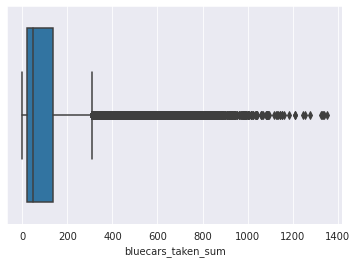

In [44]:
#checking for outliers

sns.boxplot(x=Autolib['bluecars_taken_sum'])


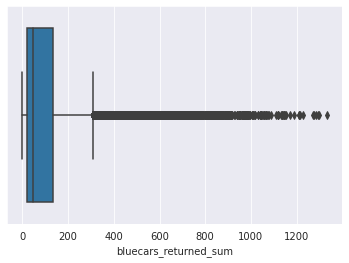

In [45]:
sns.boxplot(x=Autolib['bluecars_returned_sum'])

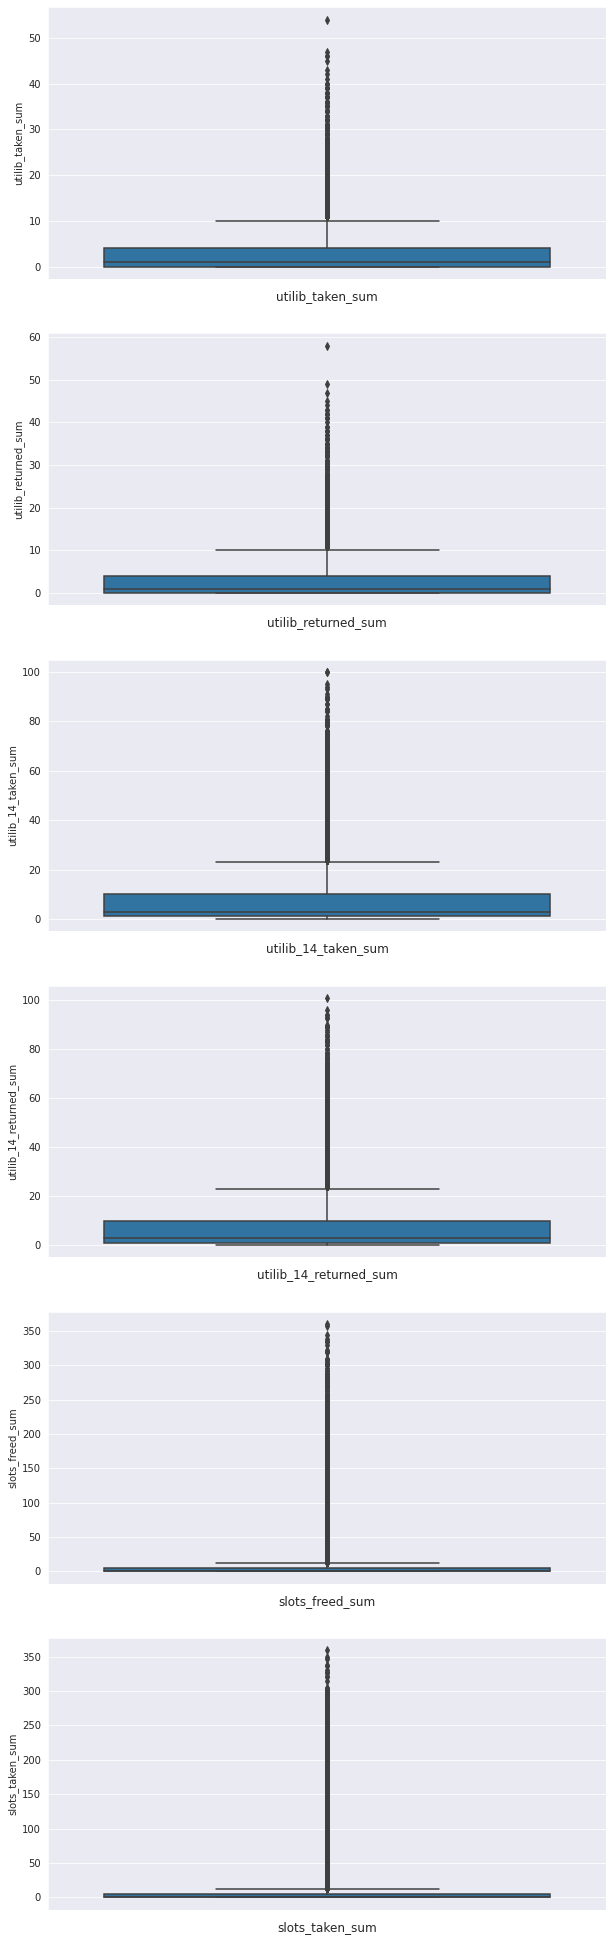

In [46]:
#checking and dealing with outliers 

col_names= [ 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(10,35))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=Autolib[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

In [47]:
#there are outliers that need to be looked into, however the high number of outliers would make eliminating them affect the results. 
Q1 = Autolib.quantile(0.25)
Q3 = Autolib.quantile(0.75)
IQR = Q3 - Q1
Autolib_cln = Autolib[~((Autolib < (Q1 - 1.5 * IQR)) | (Autolib > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Autolib)
print(Autolib_cln)

      postal_code       date  ...  slots_freed_sum slots_taken_sum
0           75001   1/1/2018  ...               22              20
1           75001   1/2/2018  ...               23              22
2           75001   1/3/2018  ...               27              27
3           75001   1/4/2018  ...               25              21
4           75001   1/5/2018  ...               18              20
...           ...        ...  ...              ...             ...
16080       95880  6/15/2018  ...                0               0
16081       95880  6/16/2018  ...                0               0
16082       95880  6/17/2018  ...                0               0
16083       95880  6/18/2018  ...                0               0
16084       95880  6/19/2018  ...                0               0

[16085 rows x 13 columns]
      postal_code       date  ...  slots_freed_sum slots_taken_sum
22          75001  1/23/2018  ...               11               9
29          75001  1/30/2018  ...  

as observed above, eliminating outliers would lose about a third of the data, therefore anlaysis will include outliers.

In [48]:
Autolib_cln = Autolib

In [49]:
#converting datatypes to required formart for analysis
Autolib_cln['date'] = pd.to_datetime(Autolib['date'])


In [50]:
Autolib_cln.dtypes

postal_code                       object
date                      datetime64[ns]
daily_data_points                  int64
day_of_week                       object
day_type                          object
bluecars_taken_sum                 int64
bluecars_returned_sum              int64
utilib_taken_sum                   int64
utilib_returned_sum                int64
utilib_14_taken_sum                int64
utilib_14_returned_sum             int64
slots_freed_sum                    int64
slots_taken_sum                    int64
dtype: object

# **Univariate Analysis**

In [51]:
Autolib_cln.describe()

,daily_data_points,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,1431.330619,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,33.212050,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1439.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1440.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,1440.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,1440.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [52]:
# Skewness
pd.DataFrame.from_dict(dict(
    {
        'bluecars_taken': Autolib_cln.bluecars_taken_sum.skew(), 
        'bluecars_returned': Autolib_cln.bluecars_returned_sum.skew(), 
        'utilib_taken': Autolib_cln.utilib_taken_sum.skew(),
        'utilib_returned_returned': Autolib_cln.utilib_returned_sum.skew(),
        'slots_feed': Autolib_cln.slots_freed_sum.skew(),
        'slots_taken': Autolib_cln.slots_taken_sum.skew()
    }), orient='index', columns=['Skewness'])

,Skewness
bluecars_taken,2.406355
bluecars_returned,2.412085
utilib_taken,2.556872
utilib_returned_returned,2.578665
slots_feed,2.597406
slots_taken,2.596904


In [53]:
# Kurtosis 
pd.DataFrame.from_dict(dict(
    {
        'bluecars_taken': Autolib_cln.bluecars_taken_sum.kurt(), 
        'bluecars_returned': Autolib_cln.bluecars_returned_sum.kurt(), 
        'utilib_taken': Autolib_cln.utilib_taken_sum.kurt(),
        'utilib_returned_returned': Autolib_cln.utilib_returned_sum.kurt(),
        'slots_feed': Autolib_cln.slots_freed_sum.kurt(),
        'slots_taken': Autolib_cln.slots_taken_sum.kurt()
    }), orient='index', columns=['Kurtosis'])

,Kurtosis
bluecars_taken,6.172692
bluecars_returned,6.186288
utilib_taken,7.702362
utilib_returned_returned,7.936357
slots_feed,6.454514
slots_taken,6.442553


The values are positively skewed and leptokurptic which indicates heavy tails i.e heavy outliers. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Postal Code')

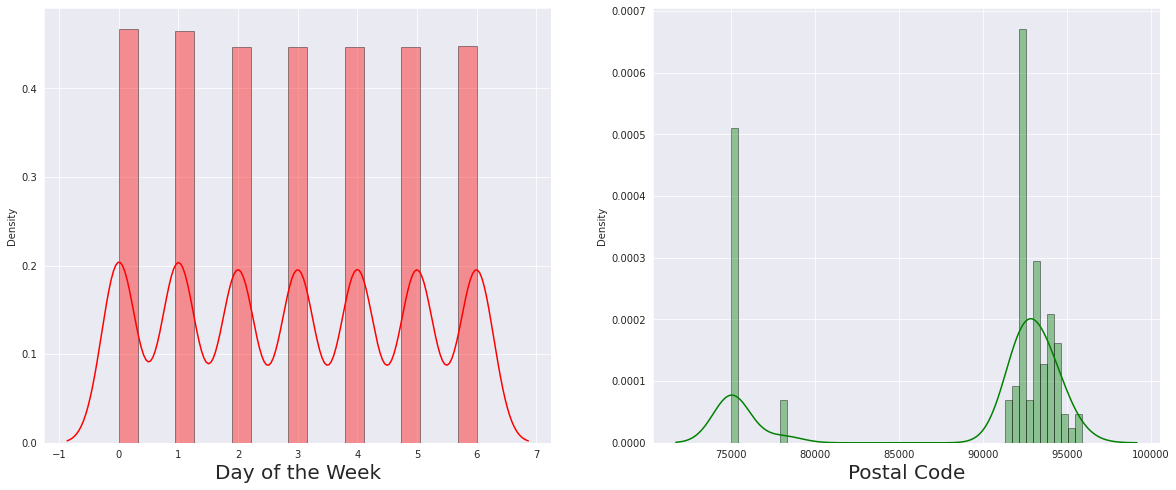

In [54]:
f, axes = plt.subplots(1, 2, figsize=(20, 8))
dayofweek = sns.distplot(Autolib_cln['day_of_week'], color="red", ax=axes[0], kde=True, hist_kws={"edgecolor":"k"})
dayofweek.set_xlabel("Day of the Week",fontsize=20)

postal_code = sns.distplot(Autolib_cln['postal_code'], color='green', ax = axes[1], kde=True, hist_kws={"edgecolor":"k"})
postal_code.set_xlabel("Postal Code",fontsize=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


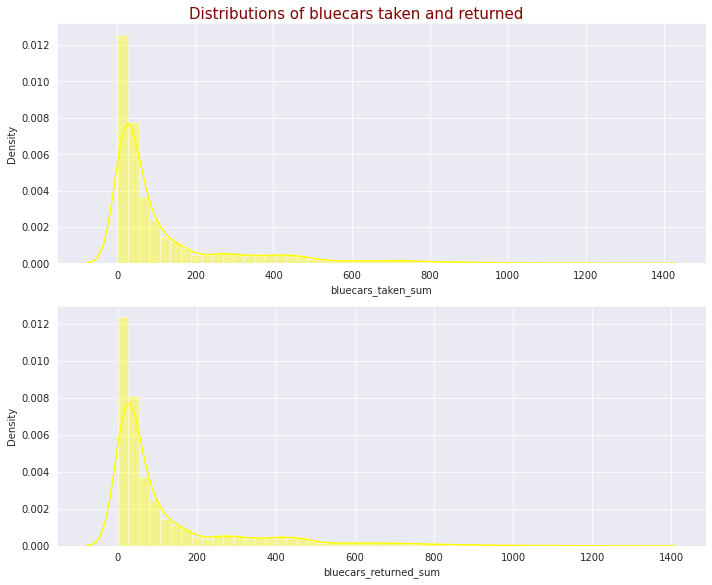

In [55]:
#histograms for the bule car columns

col_names = ['bluecars_taken_sum', 'bluecars_returned_sum']
sns.set_style('darkgrid')
fig, axes = plt.subplots(len(col_names), figsize = (10, 8))
fig.suptitle('Distributions of bluecars taken and returned', y= 1.01, color = 'maroon', fontsize = 15)

for ax, data, name in zip(axes.flatten(), Autolib_cln, col_names):
  sns.distplot(Autolib_cln[name], ax = ax, kde = True, color = 'yellow')
plt.tight_layout()

# both coulmns appear to be positively skewed and normally distributed. 

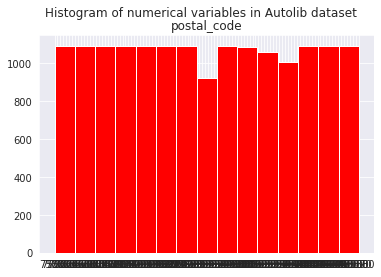

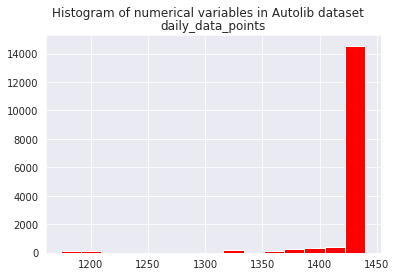

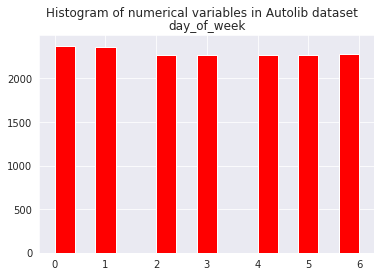

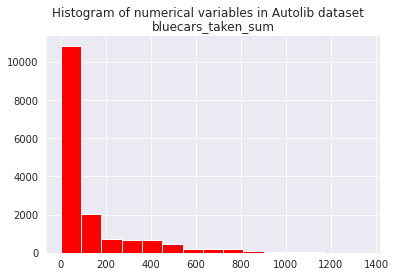

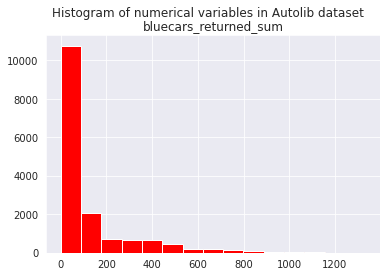

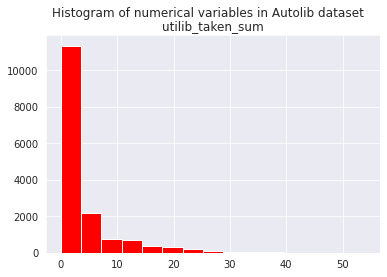

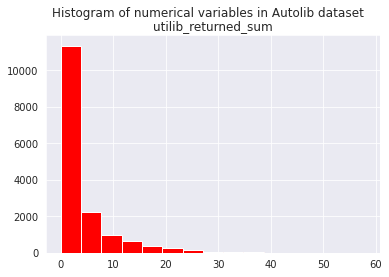

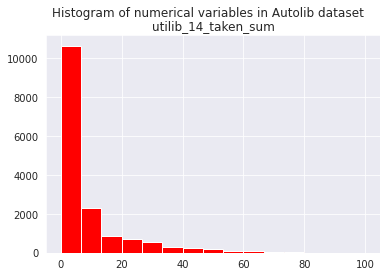

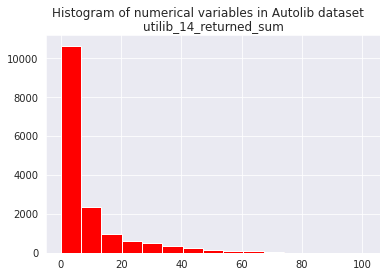

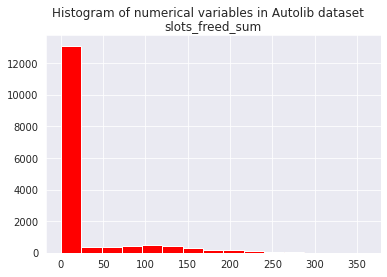

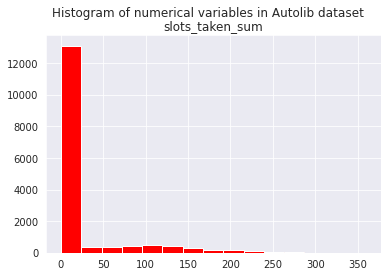

In [56]:
#Numerical analysis
Num_vars = ['postal_code', 'daily_data_points', 'day_of_week',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']
for col in Num_vars:
  plt.hist(Autolib_cln[col],bins=15,color="red")
  plt.suptitle("Histogram of numerical variables in Autolib dataset")
  plt.title(col)
  plt.show()

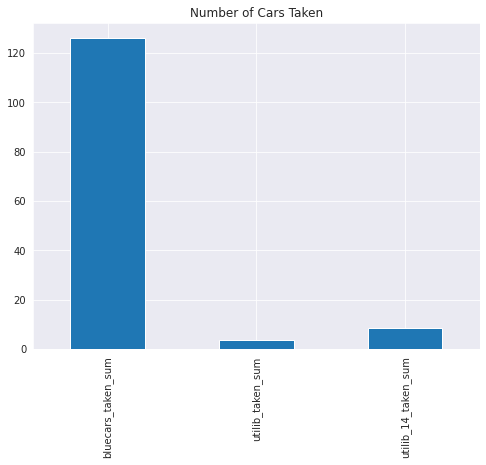

In [57]:
#comparing the number of cars taken
Autolib_cln[['bluecars_taken_sum','utilib_taken_sum','utilib_14_taken_sum']].mean().plot(kind='bar',figsize=(8,6),stacked=True)
plt.title('Number of Cars Taken')
plt.show()

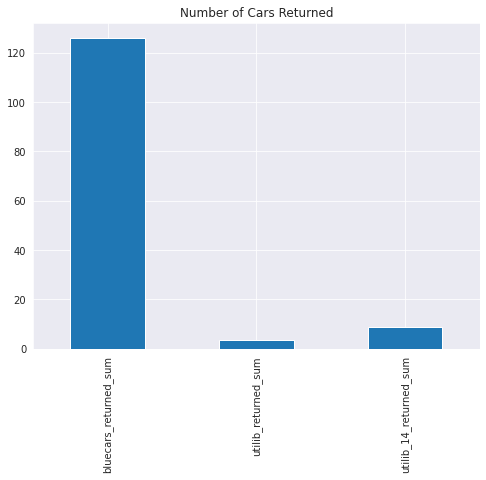

In [58]:
Autolib_cln[['bluecars_returned_sum','utilib_returned_sum','utilib_14_returned_sum']].mean().plot(kind='bar',figsize=(8,6),stacked=True)
plt.title('Number of Cars Returned')
plt.show()

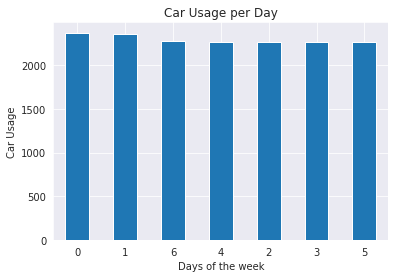

In [59]:
#Plotting the usage per day
Autolib_cln.day_of_week.value_counts().plot(kind='bar',rot=0)
plt.xlabel('Days of the week')
plt.ylabel('Car Usage')
plt.title('Car Usage per Day')
plt.show()


The use seems to be fairly consistent over the weekdays with a noted decline as the weekend approaches.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


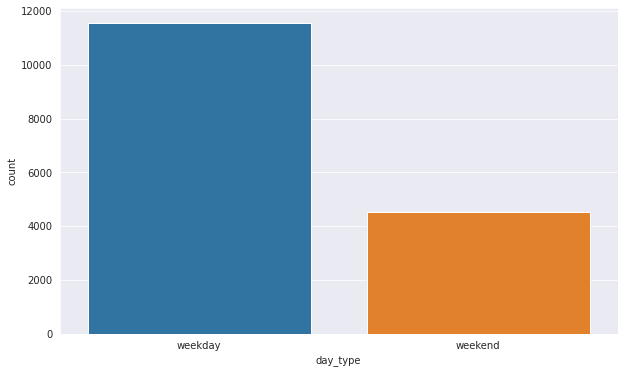

In [60]:
#comparing the different type of days in a graph
plt.figure(figsize=(10, 6))
sns.countplot(Autolib_cln.day_type,order = Autolib_cln.day_type.value_counts().index)


As seen above, usage is higher on the weekdays relative to the weekends. 

In [61]:
Autolib_cln['bluecars_returned_sum'].value_counts()

13      260
12      254
10      249
9       243
11      242
       ... 
556       1
588       1
604       1
628       1
1287      1
Name: bluecars_returned_sum, Length: 929, dtype: int64

In [62]:
Autolib_cln['bluecars_taken_sum'].value_counts()

12      261
14      253
9       247
11      246
13      238
       ... 
833       1
825       1
809       1
801       1
1335      1
Name: bluecars_taken_sum, Length: 932, dtype: int64

# **Bivariate Analysis**

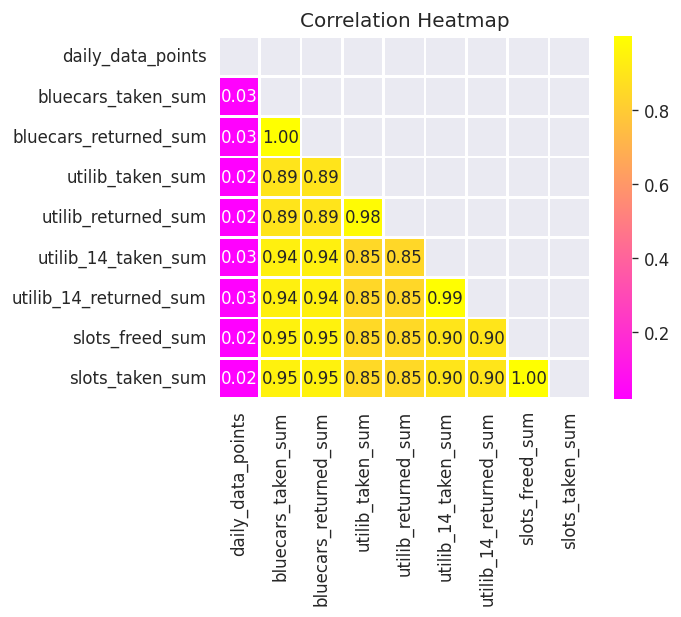

In [115]:
# Correlation
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(Autolib_cln.corr(),dtype = bool))
sns.heatmap(Autolib_cln.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'spring')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [64]:
Autolib_num =  Autolib_cln.drop(['postal_code','daily_data_points','day_type', 'day_of_week'] ,axis=1)

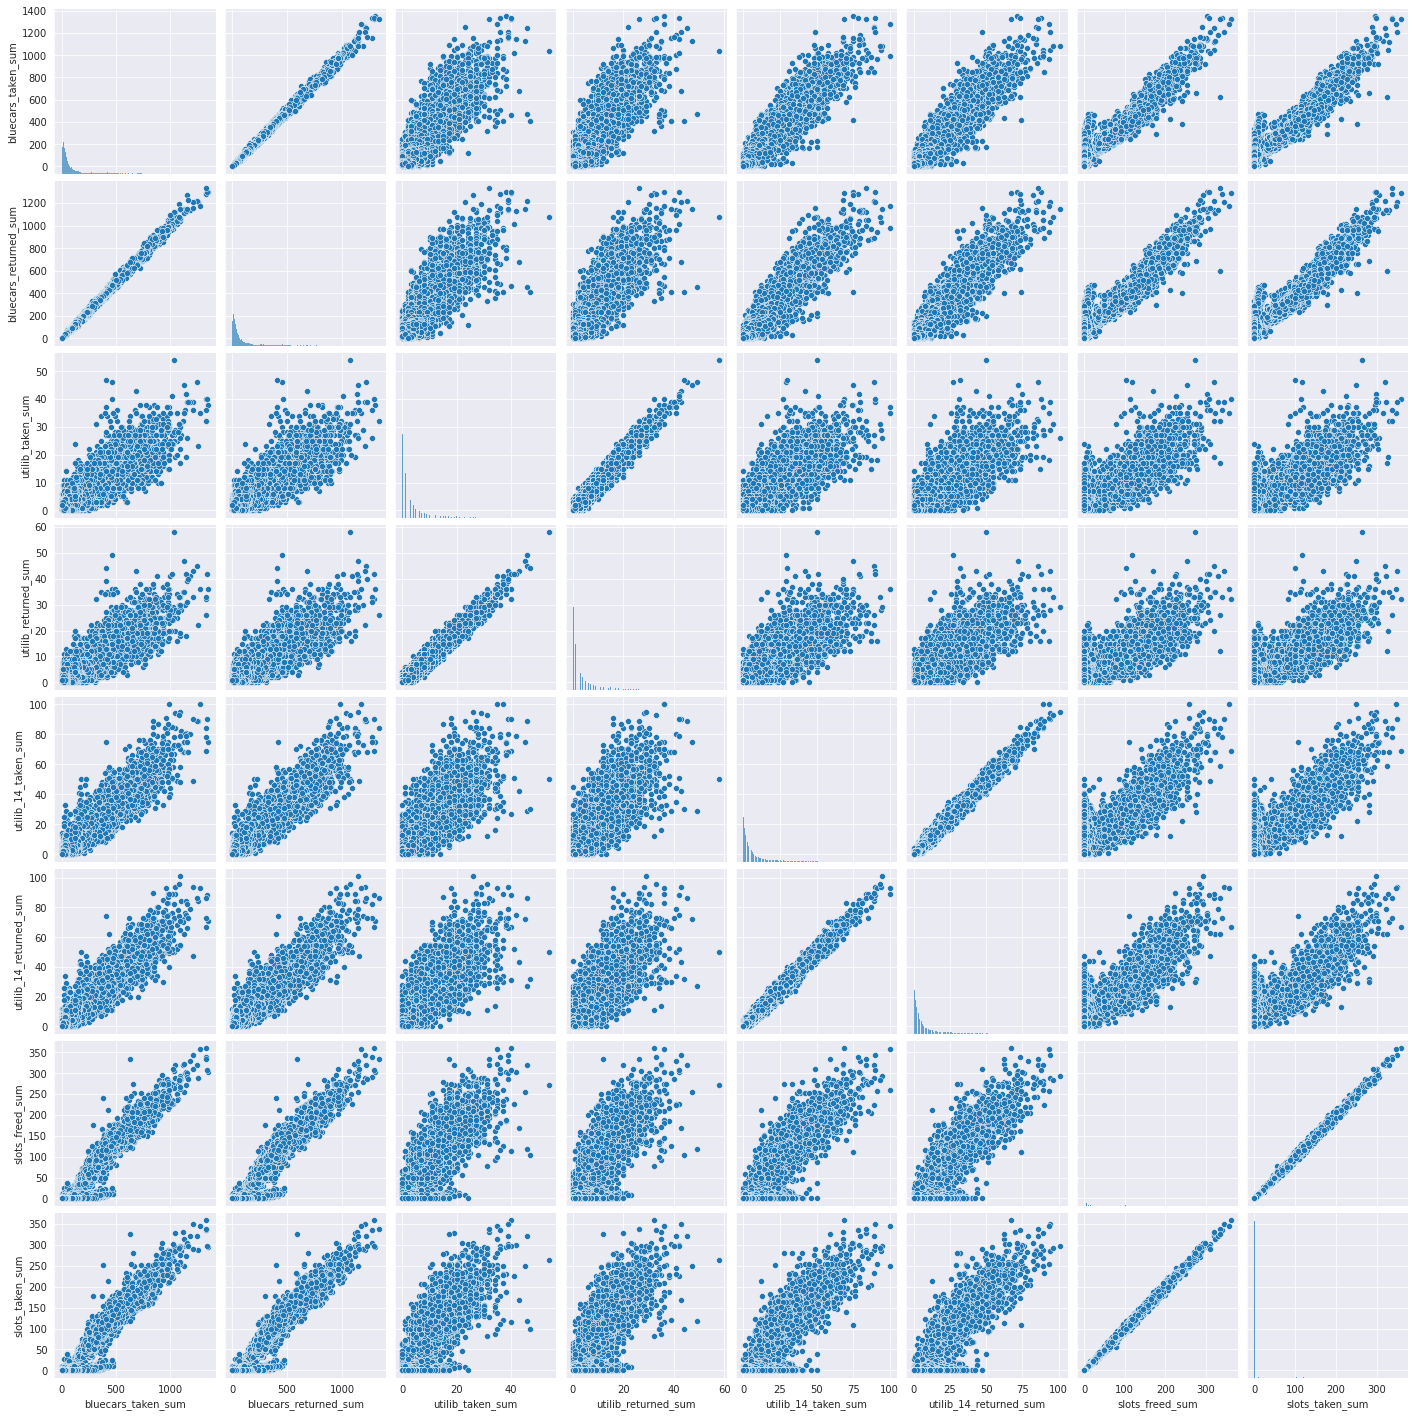

In [65]:
sns.pairplot(Autolib_num)
plt.show()

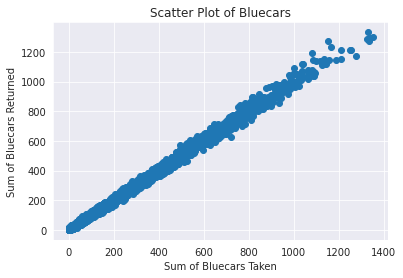

In [66]:
#visualising relationships between blue cars taken and returned

plt.scatter(x = Autolib_cln['bluecars_taken_sum'], y = Autolib_cln['bluecars_returned_sum'])
plt.title('Scatter Plot of Bluecars')
plt.xlabel('Sum of Bluecars Taken')
plt.ylabel('Sum of Bluecars Returned')
plt.show()


we observe a positive linear relationship between the number of bluecars taken and returned

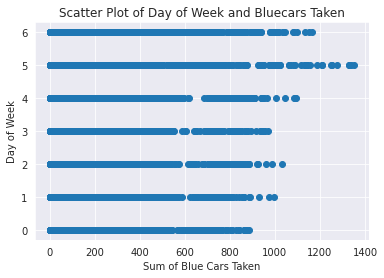

In [67]:
#scatter plots for bluecars taken and day of the week
plt.scatter(x = Autolib_cln['bluecars_taken_sum'], y = Autolib_cln['day_of_week'])
plt.title('Scatter Plot of Day of Week and Bluecars Taken')
plt.xlabel('Sum of Blue Cars Taken')
plt.ylabel('Day of Week')
plt.show()



we can see that most bluecars are taken on Saturday followed by Sunday and Friday
We have the least number of blue cars being taken on Monday

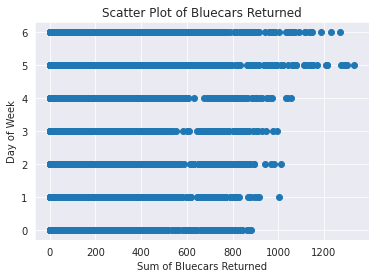

In [68]:
#scatter plots for bluecars returned and day of the week
plt.scatter(x = Autolib_cln['bluecars_returned_sum'], y = Autolib_cln['day_of_week'])
plt.title('Scatter Plot of Bluecars Returned')
plt.xlabel('Sum of Bluecars Returned')
plt.ylabel('Day of Week')
plt.show()



the trends are fairly consistent implying that blue cars may be returned the same day they are taken

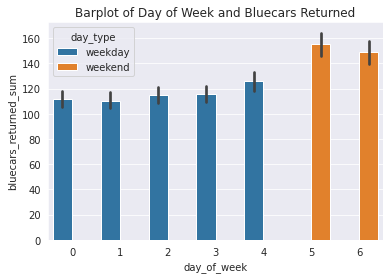

In [69]:
sns.barplot(x= 'day_of_week', y = 'bluecars_returned_sum', data = Autolib_cln, hue='day_type')
plt.title('Barplot of Day of Week and Bluecars Returned')
plt.show()

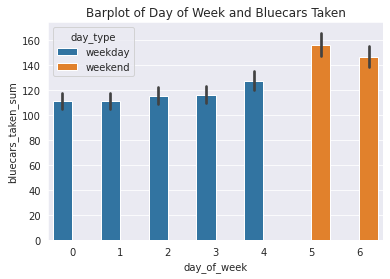

In [70]:
sns.barplot(x= 'day_of_week', y = 'bluecars_taken_sum', data = Autolib_cln, hue='day_type')
plt.title('Barplot of Day of Week and Bluecars Taken')
plt.show()

In [71]:
Autolib_cln.groupby('day_type')['bluecars_taken_sum'].value_counts()

day_type  bluecars_taken_sum
weekday   12                    209
          9                     202
          11                    201
          10                    197
          14                    193
                               ... 
weekend   1327                    1
          1330                    1
          1335                    1
          1338                    1
          1352                    1
Name: bluecars_taken_sum, Length: 1533, dtype: int64

In [72]:
Autolib_cln.groupby('day_type')['bluecars_returned_sum'].value_counts()

day_type  bluecars_returned_sum
weekday   12                       208
          10                       205
          9                        204
          11                       194
          13                       193
                                  ... 
weekend   1276                       1
          1287                       1
          1294                       1
          1300                       1
          1332                       1
Name: bluecars_returned_sum, Length: 1503, dtype: int64

# **Sampling**

In [116]:
#this splits the dataset into weekdays and weekends for analysis
Weekdays = Autolib_cln[Autolib_cln['day_type']=='weekday']
Weekends = Autolib_cln[Autolib_cln['day_type']=='weekend']

In [117]:
#this gives another sample of data from Mondays and Fridays
Mondays = Weekdays[Weekdays['day_of_week']=='0']
Fridays = Weekdays[Weekdays['day_of_week']=='4']

In [118]:
#we select a random sample to work with

Monday_pop=Mondays.shape[0]
Monday_samp=int(0.1*Monday_pop)
print("The sample size for Monday's info is: ", Monday_samp)

The sample size for Monday's info is:  237


In [119]:
Friday_pop=Fridays.shape[0]
Friday_samp=int(0.1*Friday_pop)
print("The sample size for Friday's info is: ", Friday_samp)

The sample size for Friday's info is:  227


In [120]:
np.random.seed(500)
Mon_data=Mondays.sample(n=Monday_samp, replace='False')
Mon_data

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
6453,92230,2018-03-05,1440,0,weekday,57,63,1,1,0,0,1,1
1856,75012,2018-06-04,1440,0,weekday,376,399,15,16,29,32,110,110
1953,75013,2018-03-26,1439,0,weekday,456,456,18,19,26,17,128,121
3966,91330,2018-03-12,1440,0,weekday,5,6,0,0,0,0,0,0
5736,92170,2018-05-07,1437,0,weekday,63,61,0,0,8,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8060,92340,2018-04-23,1417,0,weekday,8,12,1,1,2,2,0,0
4492,92000,2018-05-21,1440,0,weekday,154,143,6,3,17,13,0,0
15326,94700,2018-01-22,1440,0,weekday,24,26,0,1,6,7,0,0
9202,92420,2018-01-15,1440,0,weekday,9,8,1,0,2,1,0,0


In [78]:
np.random.seed(500)
Fri_data=Fridays.sample(n=Friday_samp, replace='False')
Fri_data

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
6744,92250,2018-02-09,1439,4,weekday,64,56,1,2,4,5,0,0
1936,75013,2018-03-09,1440,4,weekday,557,572,21,18,31,26,139,141
2039,75014,2018-01-12,1439,4,weekday,515,498,16,18,32,34,117,114
4140,91370,2018-03-30,1434,4,weekday,9,9,0,0,1,3,0,0
5989,92200,2018-03-09,1440,4,weekday,40,40,3,3,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,75015,2018-01-05,1440,4,weekday,852,846,21,18,70,71,196,198
472,75004,2018-01-05,1440,4,weekday,194,203,5,5,16,17,39,39
8597,92380,2018-02-02,1440,4,weekday,20,17,0,0,2,1,0,0
9145,92410,2018-04-27,1440,4,weekday,12,6,1,1,1,2,0,0


In [79]:
#to analyse based on postal codes, we will need a stratified sample
Strat_df = Weekends.groupby('postal_code', group_keys = False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))

print(Strat_df['postal_code'].value_counts())

# Check the stratified output
print(Strat_df)


92240    4
92100    4
93310    4
93200    4
75014    4
        ..
75010    4
92120    4
93600    4
94130    4
93390    2
Name: postal_code, Length: 104, dtype: int64
      postal_code       date  ...  slots_freed_sum slots_taken_sum
131         75001 2018-05-26  ...               37              38
94          75001 2018-04-08  ...               29              28
132         75001 2018-05-27  ...               29              28
19          75001 2018-01-20  ...               41              39
175         75002 2018-01-20  ...               49              49
...           ...        ...  ...              ...             ...
15853       95870 2018-03-25  ...                0               0
15976       95880 2018-02-17  ...                0               0
16037       95880 2018-04-22  ...                0               0
16016       95880 2018-04-01  ...                0               0
15977       95880 2018-02-18  ...                0               0

[414 rows x 13 columns]


In [80]:
#a sample from this stratum
Postal_code = pd.DataFrame(Strat_df)
Postal_code


,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
131,75001,2018-05-26,1440,5,weekend,202,201,5,5,9,9,37,38
94,75001,2018-04-08,1440,6,weekend,119,117,1,1,13,13,29,28
132,75001,2018-05-27,1440,6,weekend,175,179,3,3,13,13,29,28
19,75001,2018-01-20,1439,5,weekend,217,217,2,2,25,25,41,39
175,75002,2018-01-20,1439,5,weekend,276,277,3,3,11,11,49,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15853,95870,2018-03-25,1380,6,weekend,14,15,0,0,0,0,0,0
15976,95880,2018-02-17,1440,5,weekend,23,19,0,0,1,2,0,0
16037,95880,2018-04-22,1440,6,weekend,19,18,0,0,3,2,0,0
16016,95880,2018-04-01,1440,6,weekend,49,47,2,1,6,5,0,0


In [81]:
Postal_code[Postal_code['postal_code']=='92000']

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
4386,92000,2018-01-21,1440,6,weekend,165,165,8,6,9,9,0,0
4425,92000,2018-03-04,1440,6,weekend,142,160,3,3,12,13,0,0
4453,92000,2018-04-01,1440,6,weekend,138,147,6,7,16,24,0,0
4414,92000,2018-02-18,1438,6,weekend,310,334,8,8,21,20,0,0


In [82]:
Postal_code.groupby(by='postal_code', group_keys = False)['daily_data_points'].value_counts()

postal_code  daily_data_points
75001        1440                 3
             1439                 1
75002        1438                 2
             1439                 1
             1440                 1
                                 ..
95100        1439                 1
95870        1440                 3
             1380                 1
95880        1440                 3
             1438                 1
Name: daily_data_points, Length: 193, dtype: int64

Three samples were obtained. These were of Monday, Friday and those of the postal code

# **Hypothesis Testing**

The objective of this analysis was to test whether there is a difference between the number of blue cars taken on Mondays and Fridays. 

H₀ :μ(Monday) = μ(Friday)    
H₁ :μ(Monday) ≠ μ(Friday)

It will also confirm if there is a difference between the number of blue cars taken over the weekend between two locations that have similar data points.

H₀ :μ(92000) = μ(75001)    
H₁ :μ(92000) ≠ μ(75001)

# **Statistical Measures**

In [83]:
Mon_data['bluecars_taken_sum'].describe()

count    237.000000
mean     101.130802
std      147.651889
min        1.000000
25%       17.000000
50%       37.000000
75%      117.000000
max      839.000000
Name: bluecars_taken_sum, dtype: float64

In [84]:
Fri_data['bluecars_taken_sum'].describe()

count    227.000000
mean     123.638767
std      176.693229
min        1.000000
25%       25.000000
50%       45.000000
75%      135.500000
max      867.000000
Name: bluecars_taken_sum, dtype: float64

In [85]:
Postal_code['bluecars_taken_sum'].describe()

count     414.000000
mean      146.074879
std       213.448480
min         0.000000
25%        24.000000
50%        58.000000
75%       141.750000
max      1132.000000
Name: bluecars_taken_sum, dtype: float64

In [121]:
#creating dataframes for the postal codes we need
Area_A = Postal_code.loc[Postal_code['postal_code'] == '92000']
Area_B = Postal_code.loc[Postal_code['postal_code'] == '75001']

In [122]:
Area_A

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
4386,92000,2018-01-21,1440,6,weekend,165,165,8,6,9,9,0,0
4425,92000,2018-03-04,1440,6,weekend,142,160,3,3,12,13,0,0
4453,92000,2018-04-01,1440,6,weekend,138,147,6,7,16,24,0,0
4414,92000,2018-02-18,1438,6,weekend,310,334,8,8,21,20,0,0


In [123]:
Area_B

,postal_code,date,daily_data_points,day_of_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
131,75001,2018-05-26,1440,5,weekend,202,201,5,5,9,9,37,38
94,75001,2018-04-08,1440,6,weekend,119,117,1,1,13,13,29,28
132,75001,2018-05-27,1440,6,weekend,175,179,3,3,13,13,29,28
19,75001,2018-01-20,1439,5,weekend,217,217,2,2,25,25,41,39


In [124]:
Area_A['bluecars_taken_sum'].describe()

count      4.000000
mean     188.750000
std       81.704243
min      138.000000
25%      141.000000
50%      153.500000
75%      201.250000
max      310.000000
Name: bluecars_taken_sum, dtype: float64

In [125]:
Area_B['bluecars_taken_sum'].describe()

count      4.000000
mean     178.250000
std       43.153795
min      119.000000
25%      161.000000
50%      188.500000
75%      205.750000
max      217.000000
Name: bluecars_taken_sum, dtype: float64

In [91]:
Weekends['bluecars_taken_sum'].describe()

count    4541.000000
mean      151.090068
std       218.565642
min         0.000000
25%        25.000000
50%        59.000000
75%       156.000000
max      1352.000000
Name: bluecars_taken_sum, dtype: float64

# **Point Estimation**

In [92]:
#estimating the mean of the Monday population data set
Population_est=stats.norm.rvs(loc=Mondays['bluecars_taken_sum'].mean(), scale=1)
Population_est

110.83890338161203

In [93]:
#estimating the mean of the Monday sample data set
Sample_estM=stats.norm.rvs(loc=Mon_data['bluecars_taken_sum'].mean(),scale=1)
Sample_estM

101.42999535302694

In [94]:
#difference between sample and population estimates
Population_est-Sample_estM

9.408908028585088

In [95]:
#following the same process for the Friday data
Population_est=stats.norm.rvs(loc=Fridays['bluecars_taken_sum'].mean(), scale=1)
Population_est

127.16744610280581

In [96]:
Sample_estF=stats.norm.rvs(loc=Fri_data['bluecars_taken_sum'].mean(),scale=1)
Sample_estF

122.5309086000665

In [97]:
Population_est-Sample_estF

4.636537502739316

In [98]:
#estimating the mean of our entire bluecars dataset
Sample_d = Autolib_cln['bluecars_taken_sum']
Sample_d

#random sampling
Sample = Sample_d.sample(n=400, replace = 'False')

#sample mean
Sample.mean()


128.495

we shall use a point estimate of 128.495 for the mean which varies from the initial 125.926951

In [99]:
125.926951-128.495

-2.568049000000002

# **Confidence Interval Estimation**

In [100]:
#the possible interval for the Monday sample mean of blue taken cars
SE=Mondays['bluecars_taken_sum'].std()/np.sqrt(Monday_samp)

stats.norm.interval(0.95, loc=Mondays['bluecars_taken_sum'].mean(), scale=SE)

(90.71037793987082, 131.60891439374333)

In [101]:
#the possible interval for the Friday sample mean of blue taken cars
SE=Fridays['bluecars_taken_sum'].std()/np.sqrt(Friday_samp)

stats.norm.interval(0.95, loc=Fridays['bluecars_taken_sum'].mean(), scale=SE)

(103.07326336791935, 151.04034297289965)

In [102]:
#the possible confidence interval for the entire data set

#getting the sample 
sample_data = Autolib_cln['bluecars_taken_sum']
sample_data

#getting sample mean
sample_mean = sample_data.mean()
sample_mean

#defining sample size
sample_size = Autolib_cln['bluecars_taken_sum'].shape[0]
sample_size

#finding standard error
std_error = sample_data.std() / np.sqrt(sample_size)
std_error

#getting the interval 
stats.norm.interval(0.95, loc=sample_mean, scale=std_error)


(123.06139032759609, 128.7925108225438)

# **Test Statistic Calculation**

In [103]:
#We fit the parameters to a normal distribution
from scipy.stats import norm

parameters=norm.fit(Mondays['bluecars_taken_sum'])

parameter=norm.fit(Mon_data['bluecars_taken_sum'])

In [104]:
from scipy.stats import norm

parameters_1=norm.fit(Fridays['bluecars_taken_sum'])

parameter_1=norm.fit(Fri_data['bluecars_taken_sum'])

In [105]:
x=np.linspace(-5,5,100)

#generating a normal dist for monday and friday.
Fitted_Monpop=norm.pdf(x, loc=parameters[0], scale=parameters[1])
Fitted_Monsam=norm.pdf(x, loc=parameter[0], scale=parameter[1])

Fitted_Fripop=norm.pdf(x, loc=parameters_1[0], scale=parameters[1])
Fitted_Frisam=norm.pdf(x, loc=parameter_1[0], scale=parameter[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


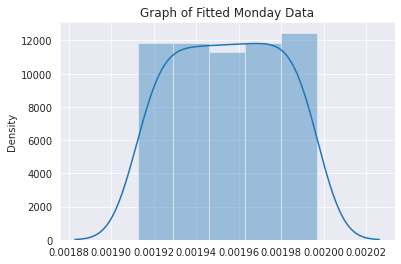

In [106]:
sns.distplot(Fitted_Monpop)
plt.title('Graph of Fitted Monday Data')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


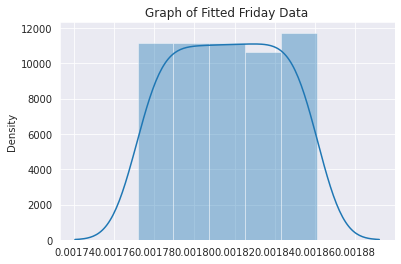

In [107]:
sns.distplot(Fitted_Fripop)
plt.title('Graph of Fitted Friday Data')
plt.show()

In [108]:
#now that both populations and samples are normally ditsributed, we can calculate the z-statistic

from math import sqrt as s
Mean_MondayFit=Fitted_Monpop.mean()
MnSample_avg=Fitted_Monsam.mean()
MnFit_popsd=Fitted_Monpop.std()

#Calculating the sample mean for the friday population
Fripop_fitavg=Fitted_Fripop.mean()
Fri_samavg=Fitted_Frisam.mean()


#this is a two tailed test hence alpha will be 0.025.
alpha=0.025

statistic = (Fri_samavg - Mean_MondayFit)/(MnFit_popsd/s(Friday_samp))
print('The test statistic is', statistic)

The test statistic is -31.21237810698284


In [109]:
#obtaining the p value

p_value = stats.norm.sf(abs(statistic))*2
print(" The p value is ", p_value)

 The p value is  7.237721174341743e-214


In [110]:
from scipy.stats import ttest_ind
from scipy import stats

n1 = n2 = 4
df = n1-1
mn1 = 188.75
mn2 = 178.250000
std1 = 81.704243
std2 = 43.153795
pop_mean = 151.090068
pop_std = 218.565642
alpha = (0.05/2)

#computing the critical value
Critical_v = stats.t.ppf(alpha, df)
print('The t_critical is:', Critical_v)

#computing the t-statistic
T_statistic = ((mn1 - mn2) - 0) / (std1/np.sqrt(n1)+ std2/np.sqrt(n2))
print('The t_statistic value is:', T_statistic)

The t_critical is: -3.1824463052842638
The t_statistic value is: 0.16819101386167865


In [111]:
Critical_v = -3.1824463052842638
T_statistic = 0.16819101386167865

# **Interpreting the Results.**

In [112]:
#For testing H₀ :μ(Monday) = μ(Friday)    
#            H₁ :μ(Monday) ≠ μ(Friday)

if p_value<alpha:
  print('Reject the Null Hypothesis')
if p_value> alpha:
  print('Fail to reject the Null Hypothesis')

Reject the Null Hypothesis


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Graph of Blue Cars Taken over the Week')

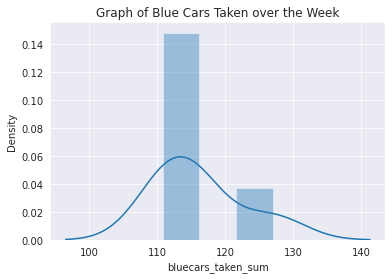

In [113]:
#We reject the null hypothesis that suggests the number of blue cars taken on Monday are equal to those taken on Friday.
#a plot of the data suggests that activity peaks twice over the week rather than remain consitent.
sns.distplot(Weekdays['bluecars_taken_sum'].groupby(Weekdays['day_of_week']).mean())
plt.title('Graph of Blue Cars Taken over the Week')

In [114]:
#For this test

#H₀ :μ(92000) = μ(75001)

#H₁ :μ(92000) ≠ μ(75001)

#The T-statistic is greater than the computed critical value hence we reject the null hypothesis and conclude that the test is significant. 

if T_statistic > Critical_v:
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Reject the null hypothesis


# **Conclusion and Recommendation**

The analsyis shows that there is enough evidence and reason to reject the following notions:
1. There is no difference between the number of bLUE cars taken on Monday and Friday
2. There is no difference between the number of blue cars taken over the weekend between areas 1 and 2.

Resources should be focused in areas and periods that are most lucrative, with research into low performing areas being made. 